# FMCA Gaussian process learning

### first import modules

In [1]:
# import seems necessary to not crash matplotlib
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (16,10)
import numpy as np
from numpy import linalg as la
import time
import FMCA

### generate data points and visualize them
(We force NumPy to use column major arrays for performance reasons)

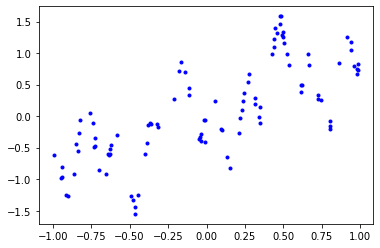

In [2]:
dim = 1
N = 100
pts = 2 * np.array(np.random.rand(1, N), order='F') - 1
f = np.sin(10 * pts) * np.cos(20 * pts) + pts + 0.1 * np.random.randn(1, N)
plt.plot(pts, f, 'b.')
plt.show()

### compute a lowrank approximation to the kernel matrix
(We force NumPy to use column major arrays for performance reasons)

In [3]:
start = time.time()
cov = FMCA.CovarianceKernel("gaussian", 0.01)
Chol = FMCA.PivotedCholesky()
Chol.computeFullPiv(cov, pts, 1e-2)
L = Chol.matrixL()
stop = time.time()
print('elapsed time lowrank: ', stop - start, 'sec.')

elapsed time lowrank: lambda min: -9.37849e-16 lambda max: 12.3105 step: 23
 0.0012979507446289062 sec.


### compute representer
(Basis elements can be retrieved by inverse transforming unit vectors)

In [4]:
LTL = np.matmul(L.transpose(), L)
LTf = np.matmul(f, L).transpose()
z = np.linalg.solve(LTL, LTf)
y = np.linalg.solve(LTL, z)
x = np.matmul(L, y)

### visualize rerpresenter

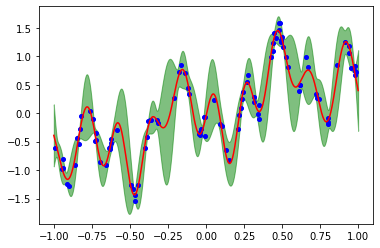

In [5]:
evalpts = np.array(np.linspace(-1, 1, num=1000), order='F').reshape(1,1000)
Keval = cov.eval(evalpts, pts)
# compute posterior covariance
LTKevalT = np.matmul(Keval, L).transpose()
z = np.linalg.solve(LTL, LTKevalT)
y = np.linalg.solve(LTL, z)
postCov = cov.eval(evalpts, evalpts) - np.matmul(LTKevalT.transpose(), y);
std = np.sqrt(np.maximum(postCov.diagonal(), 0)).transpose()
xeval = (np.matmul(Keval, x)).transpose()
# plot everything
plt.fill_between(evalpts.flatten(), (xeval-3*std).flatten(),
                 (xeval+3*std).flatten(),color='green', alpha=0.5)
plt.plot(pts, f, 'bo', markersize=4)
plt.plot(evalpts.flatten(), xeval.flatten(),'r')
plt.show()